In [1]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import rdFMCS, DataStructs, Draw, rdmolops
from rdkit.Chem.AtomPairs import Pairs
import warnings
from rdkit import RDLogger
# Suppress RDKit warnings
RDLogger.DisableLog('rdApp.*')
# Suppress all Python warnings
warnings.filterwarnings("ignore")

In [2]:
target_mol = Chem.MolFromSmiles("C1C=CC(=O)O[C@H]1/C=C/C[C@H](C[C@@H](/C=C/C2=CC=CC=C2)O)O")

In [3]:
for i, atom in enumerate(target_mol.GetAtoms()):
    atom.SetProp("atomLabel", str(i))

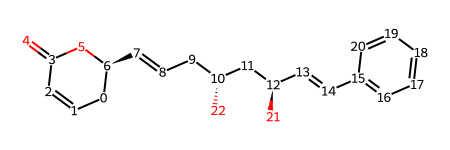

In [4]:
target_mol

In [5]:
def getSubmolRadN(mol, radius):
    atoms = mol.GetAtoms()
    submols = []
    for atom in atoms:
        env=Chem.FindAtomEnvironmentOfRadiusN(mol, radius, atom.GetIdx())
        amap={}
        submol=Chem.PathToSubmol(mol, env, atomMap=amap)
        subsmi=Chem.MolToSmiles(submol, rootedAtAtom=amap[atom.GetIdx()], canonical=False)
        submols.append(Chem.MolFromSmiles(subsmi, sanitize=False))
    return submols

In [47]:
submols = getSubmolRadN(mol = target_mol, radius = 6)

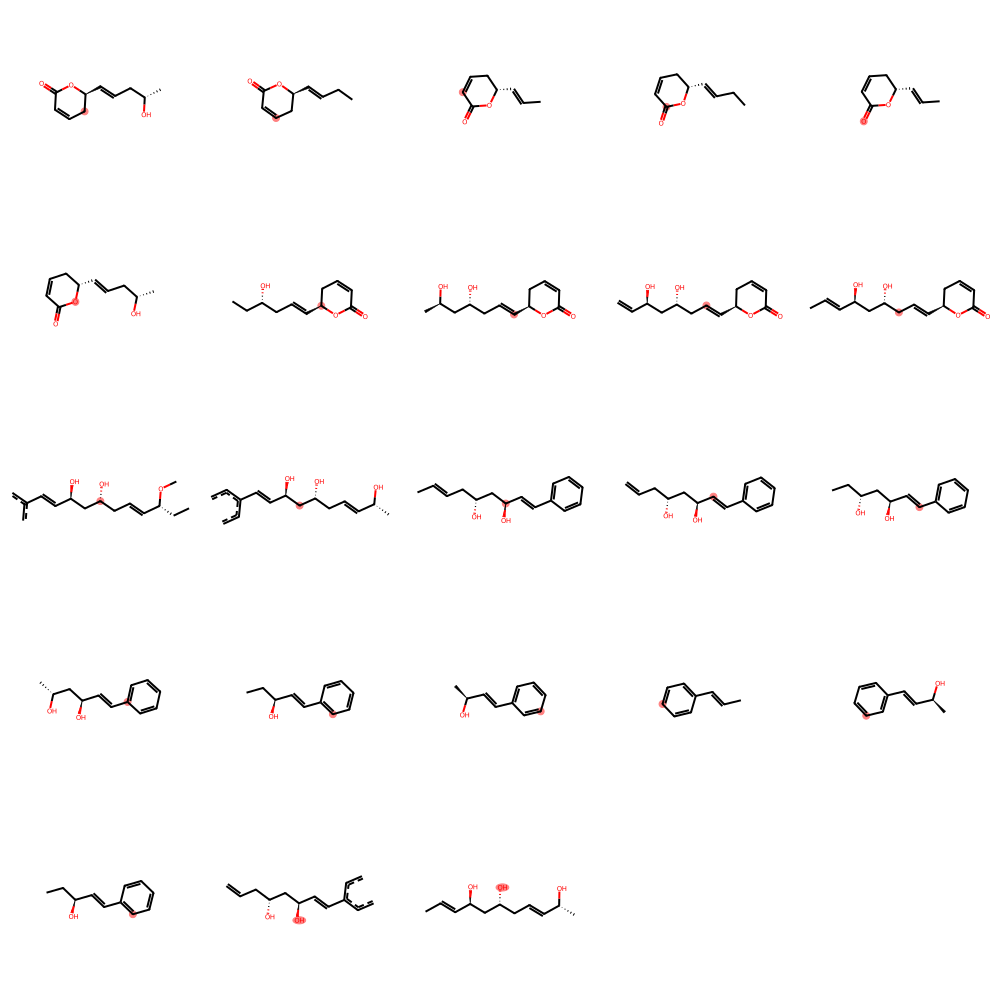

In [48]:
Draw.MolsToGridImage(submols, highlightAtomLists=[[0] for _ in range(len(submols))], molsPerRow=5)

In [22]:
all_submols = []
for i in range(1, 10):
    submols = getSubmolRadN(mol = target_mol, radius = i)
    all_submols.extend(submols)

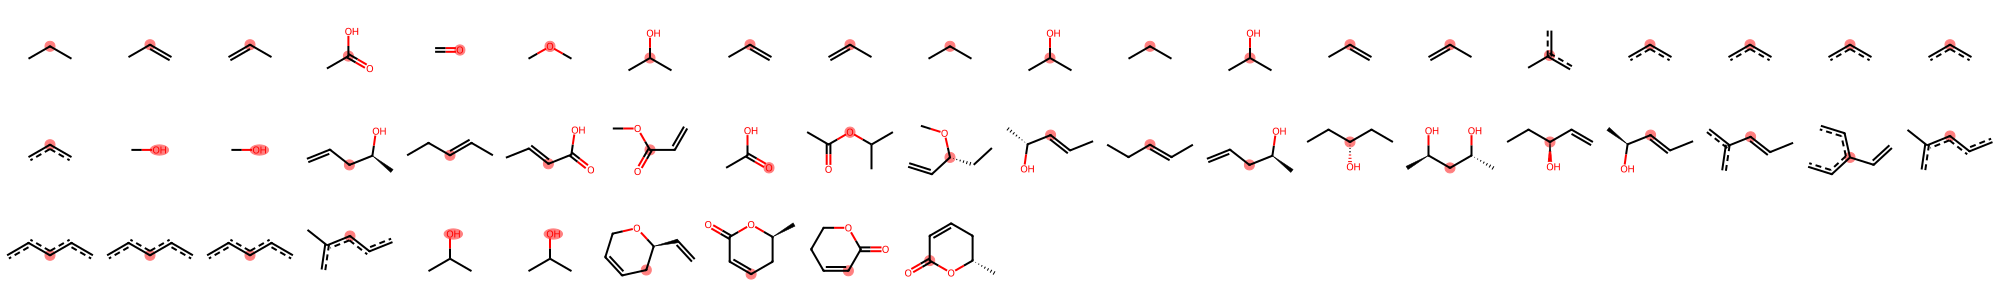

In [41]:
Draw.MolsToGridImage(all_submols, 
                     useSVG = True,
                     highlightAtomLists=[[0] for _ in range(len(all_submols))], 
                     molsPerRow= 20,
                     subImgSize = (100, 100))

In [ ]:
def are_isomorphic(mol1, mol2, consider_stereo: bool = False):
    if consider_stereo:
        is_isomorphic = mol1.HasSubstructMatch(mol2, useChirality = True) and mol2.HasSubstructMatch(mol1, useChirality = True)
    else:
        is_isomorphic = mol1.HasSubstructMatch(mol2) and mol2.HasSubstructMatch(mol1)
        
    return is_isomorphic

In [50]:
for submol in all_submols:
    if are_isomorphic(mol1 = submol,
                      mol2 = Chem.MolFromSmiles("C=CC1CC=CCO1")):
        print("YES")

YES
